<a href="https://colab.research.google.com/github/gustavococoo/Jupyter-Notebook/blob/main/Knn_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [23]:
# Carregando a base de dados:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Informaçoes sobre a base:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
labelencoder = LabelEncoder()
df = df.apply(labelencoder.fit_transform)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [26]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']

In [33]:
X = df.drop(columns=['species'])


Y = df['species'].values

In [39]:
# Dividindo os dados em treino e teste:
#X_train,X_test,y_train,y_test = train_test_split(X,Y, shuffle = True, test_size=0.2,random_state=0)

# Normalizando os dados em treino e teste:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler  
labelcoder = LabelBinarizer()
Y = labelcoder.fit_transform(Y)
sc = StandardScaler()  
sc.fit(X)
X = sc.transform(X) 

In [44]:
n_splits = 3
kf = KFold(n_splits=n_splits)
cvscores = []
cvhistory = []
cvclassification_report = []
cvconfusion_matrix = []
for train, test in kf.split(X):
  print('-'*50)
  X_train = X[train]
  Y_train = Y[train]
  X_test = X[test]
  Y_test = Y[test]

  from sklearn.neighbors import KNeighborsClassifier
  knn_classifier = KNeighborsClassifier(n_neighbors= 3)
  knn_classifier.fit(X_train, Y_train)
  y_pred = knn_classifier.predict(X_test)
  print(metrics.classification_report(y_teste, y_pred))

--------------------------------------------------


NameError: ignored

In [14]:
error = []
import numpy as np
# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

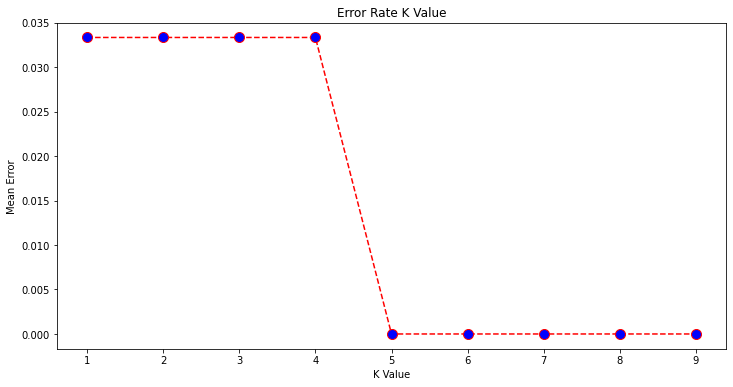

In [15]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 